In [7]:
from rav_get import *
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

In [2]:
s = ravelry_load_auth('ravelry_auth.csv')

In [3]:
favorites = []
for page in range (1,8):
    query = {'sort':'favorites','page_size':'200','page': str(page)}
    top_patterns = ravelry_pattern_search(query,s)
    top_pattern_info = ravelry_patterns(top_patterns,s)
    top = top_pattern_info.json()['patterns']
    for item in top:
        favorites.append(top[item]['favorites_count'])

In [43]:
favorites.sort(reverse=True)

Text(0.5, 0, 'pattern rank')

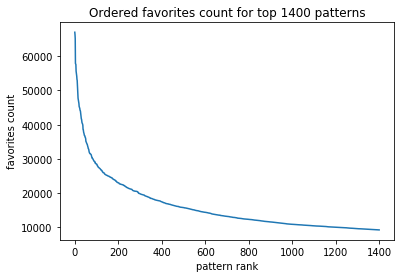

In [52]:
# Take a look at the ordered favorites counts
plt.plot(favorites)
plt.title('Ordered favorites count for top 1400 patterns')
plt.ylabel('favorites count')
plt.xlabel('pattern rank')

In [28]:
# Define functions for fitting exponential curve

def func_exponential_decay(x, a, k, b):
    return a*np.exp(x*k) + b

def func_get_efold_time(y, popt):
    return np.log(((max(y) * np.exp(-1)) - popt[2]) / popt[0]) / popt[1]


In [13]:
# Fit decaying exponential curve to favorites data
x = np.array(range(1,len(favorites)+1))
y = np.array(favorites)/max(favorites) # normalize y

popt_exponential, pcov_exponential = scipy.optimize.curve_fit(func_exponential, x, y, p0=[1,-0.5,1])

C:\Users\Ana\anaconda3\envs\pyenv\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in exp
  


In [49]:
# Calculate the e-folding number for this fit
Te = func_get_efold_time(y, popt_exponential)
print('Based on this fit, the top ' + str(int(Te)) + ' patterns have at least ' + str(int(np.exp(-1) * 100)) + '% of the max favorites count')

Based on this fit, the top 192 patterns have at least 36% of the max favorites count


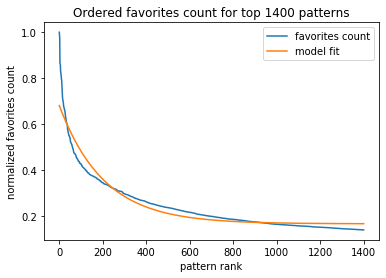

In [53]:
# Visualize the fit
plt.plot(x, y, label = 'favorites count')
plt.plot(x, exponential(x, *popt_exponential), label = 'model fit')
plt.title('Ordered favorites count for top 1400 patterns')
plt.ylabel('normalized favorites count')
plt.xlabel('pattern rank')
plt.legend()

While the exponential curve fitted to this data isn't the best fit (it underestimates counts for the top patterns and overestimates for the lower patterns), it helped us get a rough cut-off for grouping the top patterns. Based on the e-folding calculation, we can say that the top 200 patterns have gotten the most favorites.